In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Pregunta 1

La siguiente ecuación diferencial 
$$ y' = \sin(x^2) $$
es separable y su solución general está dada por 
$$ y = \int \sin(x^2) dx $$
pero $f(x)= \sin(x^2)$ no tiene primitiva, por ende no es posible determinar una solución explícita. A pesar de lo anterior, es posible estudiar su comportamiento de manera numérica, dada una condición inicial.

Considere el PVI

$$  y'=  \sin(x^2) \quad ; \quad y(0) = 2$$

* a) Utilizando el método de Euler, determine una aproximación de $y(10)$ en las siguientes condiciones
    
    * Cantidad de iteraciones $n=300$
    * Paso $h=0,1$ 

* b)  El valor de $y(10)$ se puede aproximar mediante la integral de Fresnel, dado por

$$ y(10)\approx 
0.7625617651416596 $$

Suponga que este es el valor real de $y(10)$ y calcule el error cometido en cada uno de los casos anteriores. Concluya cuál es una mejor aproximación.

## Solución:

In [14]:
x = np.linspace(-5,5,15)
def funcion(x, y):
    return np.sin(x**2)

def aproxEulerh(f,x0,xn,y0,h):
    n = (xn - x0)/h
    for i in range(int(n+1)):
        x = x0 + i*h
        y0 = y0 + h*f(x, y0)
        #print("Aprox para y(" + str(round(x,1)) + "):" + str(round(y0,2)))
    print("Para h= " + str(h) + " la aprox para y(" + str(round(x,1)) + "):" + str(round(y0,7)))
    return y0
        
def aproxEulern(f,x0,xn,y0,n):
    h = (xn - x0)/n
    #print(h)
    for i in range(int(n+1)):
        x = x0 + i*h
        y0 = y0 + h*f(x, y0)
        #print("Para n= " + str(n) +" la aprox para y(" + str(round(x,3)) + "):" + str(round(y0,2)))
    print("Para n= " + str(n) +" la aprox para y(" + str(round(x,1)) + "):" + str(round(y0,7)))
    return y0

y1 = aproxEulern(funcion, 0, 10, 2, 300)
y2 = aproxEulerh(funcion, 0, 10, 2, 0.1)


#Luego, el error asociado a cada uno de los casos es:

e1 = abs(0.7625617651416596 - y1)
e2 = abs(0.7625617651416596 - y2)

print("El error para n=300 es: " + str(e1))
print("El error para h=0.1 es: " + str(e2))



Para n= 300 la aprox para y(10.0):2.5768402
Para h= 0.1 la aprox para y(10.0):2.5737723
El error para n=300 es: 1.8142784416029913
El error para h=0.1 es: 1.811210501497508


* El error más grande es para $n=300$, por lo que la mejor aproximación es para el caso $h=0.1$

## Pregunta 2

La siguiente EDO se denomina modelo logístico y se utiliza para modelar el crecimiento de una población y se utiliza cuando el crecimiento poblacional está limitado por algún factor propio del entorno (por ejemplo alimento o espacio de habitat limitado)

$$ \dfrac{dP}{dt} = k\left( 1- \frac{P}{N}  \right) P $$

donde 

* $t$ representa el tiempo (variable independiente)
* $P$ representa la población en el instante $t$ (variable dependiente)
* $k$ coeficiente de crecimiento para poblaciones pequeñas
* $N$ coeficiente de "capacidad" del ambiente 

El modelo anterior corresponde a una EDO **separable** y **autónoma**.

Suponga que para cierta población de bacterias, $k=3$ y la capacidad del medio en que se encuentran corresponde a $N=10$ (medidos en miles, al igual que $P$).

* a) Bajo las condiciones dadas, determine (si es posible) la(s) población(es) de equilibrio.
* b) Sin resolver la EDO y solo con métodos cualitativos, determine $\displaystyle\lim_{t \to \infty} P(t)$ para diferentes poblaciones iniciales. Determine cuál es la población de bacterias que se mantiene a lo largo del tiempo. Justifique su respuesta con herramientas vistas en clases.



## Solución:

a) Evaluando la EDO en las constantes se puede reescribir de la siguiente forma: $$\frac{dP}{dt}=\frac{3P}{10}(10-P)=f(P)$$

Luego, recordando el contenido de EDOs autónomas buscamos los valores de $y_0$ tal que: $$f(y_0)=0$$

De la EDO se pueden ver dos soluciones, o en este caso poblaciones de equilibrio: $$y=0 \wedge y=10$$

b) Con el gráfico mostrado a continuación se puede apreciar el campo de direcciones de la EDO:

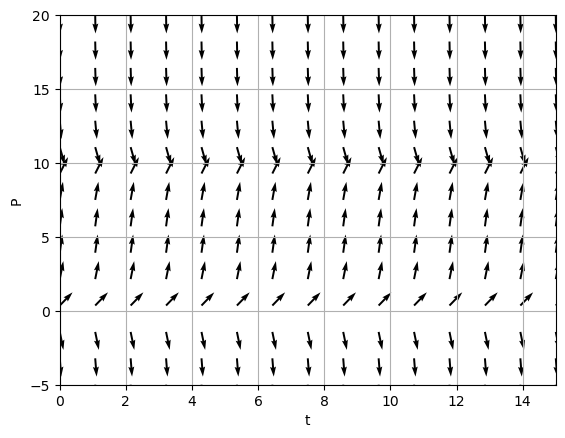

In [30]:
t,P=np.meshgrid(np.linspace(0,15,15), np.linspace(-5,20,15))

U = 1.0
V = 3*(1-(P/10))*P

N = np.sqrt(U ** 2 + V ** 2)#Normalizamos los vectores
U = U / N
V = V / N

plt.quiver(t, P, U, V) #graficamos los vectores con origen en (x,y) y término (u,v)
plt.xlim([0, 15]) #limites en eje x
plt.ylim([-5, 20]) #limites en eje y

plt.xlabel('t') #etiqueta eje x
plt.ylabel('P') #etiqueta eje y
plt.grid()# para establecer red en la región

* Por supuesto, el campo de direcciones solo tiene sentido para $P>0$ ya que las poblaciones deben ser no negativas. Por otro lado, observando el campo, se puede apreciar que el $\lim_{t\to\infty} P(t)$ para diferentes poblaciones iniciales es $P=10$. Esto ocurre, debido a que la población de equilibrio $P=10$ es un sumidero, ya que las lineas de campo, convergen hasta este valor cuando $t\to\infty$, por lo que esa es la población que se mantiene a lo largo del tiempo.

* OBS: La población de equilibrio $P=0$ es fuente, ya que observando el gráfico, se observa que las lineas de campo se alejan de este a medidad que $t\to\infty$